<a href="https://colab.research.google.com/github/rsskga/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Raina_Gustafson_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

In [0]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## 1.1

Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [7]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
customers = [127, 80, 105, 92, 120, 115, 93]
data = {'sales': sales, 'customers': customers}

df = pd.DataFrame(data)
df

,sales,customers
0,3505,127
1,2400,80
2,3027,105
3,2798,92
4,3700,120
5,3250,115
6,2689,93


In [8]:
# Variance is the average of the squared differences from the mean
# The standard deviation is the square root  (√)  of the variance

def meanvar(nums):
  numbers = len(nums)
  total = 0
  for num in nums:
    total += num
  mean = total/numbers
  diffs = []
  for num in nums:
    diffs.append((mean - num)**2)
  variance = 0
  for diff in diffs:
    variance += diff
  return [mean, variance/numbers]

sales_avg, sales_var = meanvar(sales)
cust_avg, cust_var = meanvar(customers)
print('mean:')
print(sales_avg)
print('\nvariance:')
print(sales_var)
print('\nstandard deviation:')
print(math.sqrt(sales_var))

mean:
3052.714285714286

variance:
183761.06122448976

standard deviation:
428.67360686714756


## 1.2

Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [9]:
print('numpy covariance:')
np.cov(np.array([customers, sales]))
print('\n\nnumpy variance:')
np.var(np.array(sales))
print(' ')
np.var(np.array(customers))
print('\n\nnumpy stdev:')
np.std(np.array(sales))
print(' ')
np.std(np.array(customers))

numpy covariance:


array([[   290.95238095,   7604.35714286],
       [  7604.35714286, 214387.9047619 ]])



numpy variance:


183761.06122448976

249.3877551020408



numpy stdev:


428.67360686714756

15.792015549069118

In [10]:
print('pandas covariance - does it matter that the diagonal is swapped \
compared to the numpy covariance above?')
df.cov()
print('\n\npandas variance:')
df['sales'].var(ddof=0)
print(' ')
df['customers'].var(ddof=0)
print('\n\npandas stdev:')
df.std(ddof=0)

pandas covariance - does it matter that the diagonal is swapped compared to the numpy covariance above?


,sales,customers
sales,214387.904762,7604.357143
customers,7604.357143,290.952381




pandas variance:


183761.06122448976

249.3877551020408



pandas stdev:


sales        428.673607
customers     15.792016
dtype: float64

## 1.3

Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [11]:
avg, variance = meanvar(customers)
print(math.sqrt(variance))
print(' ')
print(np.std(np.array(customers)))

15.792015549069118
 
15.792015549069118


In [12]:
# for some reason i'm unable to calculate this properly without the library


# standardize the covariance to find the correlation coefficient

# If we divide our covariance values by the product of the standard deviations 
# of the two variables, we'll end up with what's called the Correlation Coefficient.

length = (1/(len(df)-1))

def cc(df):
  total = 0
  for index, row in df.iterrows():
    for label, content in row.items():
      factors = 1
      # print(content)
      # print(df[label].mean())# 3052.714285714286 / 104.57142857142857
      factors *= ((content - df[label].mean())/df[label].std(ddof=0))
      # print(factors)
    total += factors
    print(total)
  return (length * total)

# print('\n' + str(cc(df)) + '\n')
# df

row0 = ((df.iloc[0,0] - df['sales'].mean())/df['sales'].std(ddof=0)) * ((df.iloc[0,1] - df['customers'].mean())/df['customers'].std(ddof=0))
row1 = ((df.iloc[1,0] - df['sales'].mean())/df['sales'].std(ddof=0)) * ((df.iloc[1,1] - df['customers'].mean())/df['customers'].std(ddof=0))
row2 = ((df.iloc[2,0] - df['sales'].mean())/df['sales'].std(ddof=0)) * ((df.iloc[2,1] - df['customers'].mean())/df['customers'].std(ddof=0))
row3 = ((df.iloc[3,0] - df['sales'].mean())/df['sales'].std(ddof=0)) * ((df.iloc[3,1] - df['customers'].mean())/df['customers'].std(ddof=0))
row4 = ((df.iloc[4,0] - df['sales'].mean())/df['sales'].std(ddof=0)) * ((df.iloc[4,1] - df['customers'].mean())/df['customers'].std(ddof=0))
row5 = ((df.iloc[5,0] - df['sales'].mean())/df['sales'].std(ddof=0)) * ((df.iloc[5,1] - df['customers'].mean())/df['customers'].std(ddof=0))
row6 = ((df.iloc[6,0] - df['sales'].mean())/df['sales'].std(ddof=0)) * ((df.iloc[6,1] - df['customers'].mean())/df['customers'].std(ddof=0))

cc = length * (row0 + row1 + row2 + row3 + row4 + row5 + row6)
cc

df.corr()

1.1233063074507061

,sales,customers
sales,1.000000,0.962834
customers,0.962834,1.000000


## 1.4

Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [13]:
df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
# df.shape
# df.head()
df.cov()
df.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

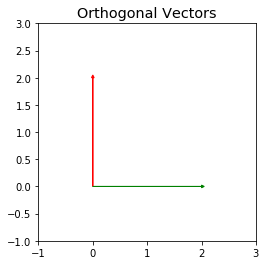

In [14]:
# synonym = perpendicular

x = [0, 2];
y = [2, 0];
fig = plt.figure();

ax = fig.add_subplot(111);
ax.set_aspect(aspect=1);
ax.arrow(0,0, x[0], x[1],head_width=.05, head_length=0.05, color ='red');
ax.arrow(0,0, y[0], y[1],head_width=.05, head_length=0.05, color ='green');

plt.style.use('ggplot');
plt.xlim(-1,3);
plt.ylim(-1,3);
plt.title("Orthogonal Vectors");

plt.show();

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [15]:
a = [-5, 3, 7]
b = [6, -8, 2]

np.dot(a, b)
# these vectors are not orthogonal
# two vectors are orthogonal if and only if their dot product is zero

-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [16]:
# they are all the same value
c = [2, -15, 6, 20]

cnorm2 = np.linalg.norm(c)**2
print(cnorm2)

cdotc = np.dot(c, c)
print(cdotc)

ctc = np.matmul(np.transpose(c), c)
print(ctc)

665.0
665
665


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}

\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} + -8\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} = 2\hat{i} + 11\hat{j} + -8\hat{k}
\end{align}

<center>OR?</center>

\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} - 8\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} = 2\hat{i} + 11\hat{j} - 8\hat{k}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [17]:
f = np.array([4, 12, 11, 9, 2])
fhat = np.divide(f, np.linalg.norm(f))
fhat

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

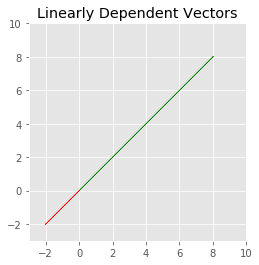

In [23]:
x = [-2, -2];
y = [8, 8];
fig = plt.figure();

ax = fig.add_subplot(111);
ax.set_aspect(aspect=1);
ax.arrow(0,0, x[0], x[1],head_width=.05, head_length=0.05, color ='red');
ax.arrow(0,0, y[0], y[1],head_width=.05, head_length=0.05, color ='green');

plt.style.use('ggplot');
plt.xlim(-3,10);
plt.ylim(-3,10);
plt.title("Linearly Dependent Vectors");

plt.show();

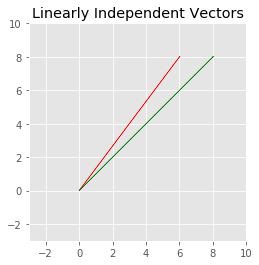

In [24]:
x = [6, 8];
y = [8, 8];
fig = plt.figure();

ax = fig.add_subplot(111);
ax.set_aspect(aspect=1);
ax.arrow(0,0, x[0], x[1],head_width=.05, head_length=0.05, color ='red');
ax.arrow(0,0, y[0], y[1],head_width=.05, head_length=0.05, color ='green');

plt.style.use('ggplot');
plt.xlim(-3,10);
plt.ylim(-3,10);
plt.title("Linearly Independent Vectors");

plt.show();

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

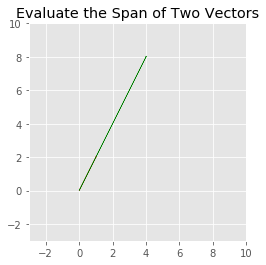

The span of these two vectors is R1


In [28]:
x = [1, 2];
y = [4, 8];
fig = plt.figure();

ax = fig.add_subplot(111);
ax.set_aspect(aspect=1);
ax.arrow(0,0, x[0], x[1],head_width=.05, head_length=0.05, color ='red');
ax.arrow(0,0, y[0], y[1],head_width=.05, head_length=0.05, color ='green');

plt.style.use('ggplot');
plt.xlim(-3,10);
plt.ylim(-3,10);
plt.title("Evaluate the Span of Two Vectors");

plt.show();

print('The span of these two vectors is R1');

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

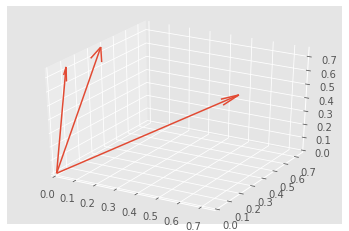

The span of these 3 vectors is R3


In [65]:
l = [1, 2, 3];
m = [-1, 0, 7];
n = [4, 8, 2];

fig = plt.figure();
ax.set_title("3D Vector");
ax = fig.gca(projection='3d');
ax.set_xlim3d(0, 0.75)
ax.set_ylim3d(0, 0.75)
ax.set_zlim3d(0, 0.75)

ax.quiver(0, 0, 0, l, m, n, arrow_length_ratio=0.1, length=1, normalize=True);

plt.show();

print('The span of these 3 vectors is R3');

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



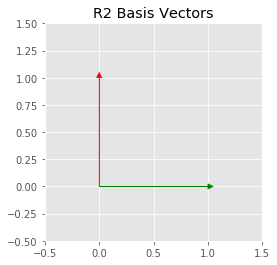

In [60]:
x = [0, 1];
y = [1, 0];
fig = plt.figure();

ax = fig.add_subplot(111);
ax.set_aspect(aspect=1);
ax.arrow(0,0, x[0], x[1],head_width=.05, head_length=0.05, color ='red');
ax.arrow(0,0, y[0], y[1],head_width=.05, head_length=0.05, color ='green');

plt.style.use('ggplot');
plt.xlim(-0.5, 1.5);
plt.ylim(-0.5, 1.5);
plt.title("R2 Basis Vectors");

plt.show();

## 6.2 What does it mean to form a basis?

The basis of a vector space 𝑉 is a set of vectors that are linearly independent and that span the vector space 𝑉.

In other words, a basis is capable of creating all points/planes/volumes in a given space.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [68]:
P = np.matrix([[1, 2, 3], [-1, 0, 7], [4, 8, 2]])
print(np.linalg.matrix_rank(P))

3


## 7.2 What does the rank of a matrix tell us?

The rank of a matrix tells us the dimension of the vector space spanned by its columns. If redundancy exists within the rows/columns of the matrix, the rank will be lower than the dimensionality of the matrix.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

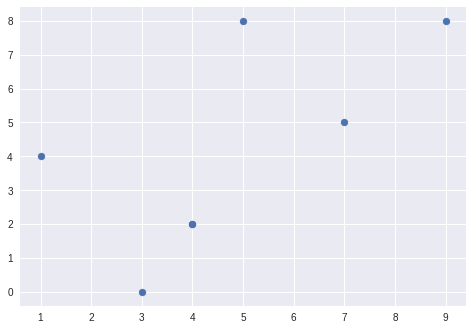

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()